0 x_train: (128, 112, 112, 3), y_train: (128,)
1 x_train: (128, 112, 112, 3), y_train: (128,)
2 x_train: (128, 112, 112, 3), y_train: (128,)
3 x_train: (128, 112, 112, 3), y_train: (128,)
4 x_train: (128, 112, 112, 3), y_train: (128,)
5 x_train: (128, 112, 112, 3), y_train: (128,)
6 x_train: (128, 112, 112, 3), y_train: (128,)
7 x_train: (128, 112, 112, 3), y_train: (128,)
8 x_train: (128, 112, 112, 3), y_train: (128,)
9 x_train: (128, 112, 112, 3), y_train: (128,)
10 x_train: (128, 112, 112, 3), y_train: (128,)
11 x_train: (128, 112, 112, 3), y_train: (128,)
12 x_train: (128, 112, 112, 3), y_train: (128,)
13 x_train: (128, 112, 112, 3), y_train: (128,)
14 x_train: (128, 112, 112, 3), y_train: (128,)
15 x_train: (128, 112, 112, 3), y_train: (128,)
16 x_train: (128, 112, 112, 3), y_train: (128,)
17 x_train: (128, 112, 112, 3), y_train: (128,)
18 x_train: (128, 112, 112, 3), y_train: (128,)
19 x_train: (128, 112, 112, 3), y_train: (128,)
20 x_train: (128, 112, 112, 3), y_train: (128,)
21

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


28 x_train: (128, 112, 112, 3), y_train: (128,)
29 x_train: (128, 112, 112, 3), y_train: (128,)
30 x_train: (128, 112, 112, 3), y_train: (128,)
31 x_train: (128, 112, 112, 3), y_train: (128,)
32 x_train: (128, 112, 112, 3), y_train: (128,)
33 x_train: (128, 112, 112, 3), y_train: (128,)
34 x_train: (128, 112, 112, 3), y_train: (128,)
35 x_train: (128, 112, 112, 3), y_train: (128,)
36 x_train: (128, 112, 112, 3), y_train: (128,)
37 x_train: (128, 112, 112, 3), y_train: (128,)
38 x_train: (128, 112, 112, 3), y_train: (128,)
39 x_train: (128, 112, 112, 3), y_train: (128,)
40 x_train: (128, 112, 112, 3), y_train: (128,)
41 x_train: (128, 112, 112, 3), y_train: (128,)
42 x_train: (128, 112, 112, 3), y_train: (128,)
43 x_train: (128, 112, 112, 3), y_train: (128,)
44 x_train: (128, 112, 112, 3), y_train: (128,)
45 x_train: (128, 112, 112, 3), y_train: (128,)
46 x_train: (128, 112, 112, 3), y_train: (128,)
47 x_train: (128, 112, 112, 3), y_train: (128,)
48 x_train: (128, 112, 112, 3), y_train:

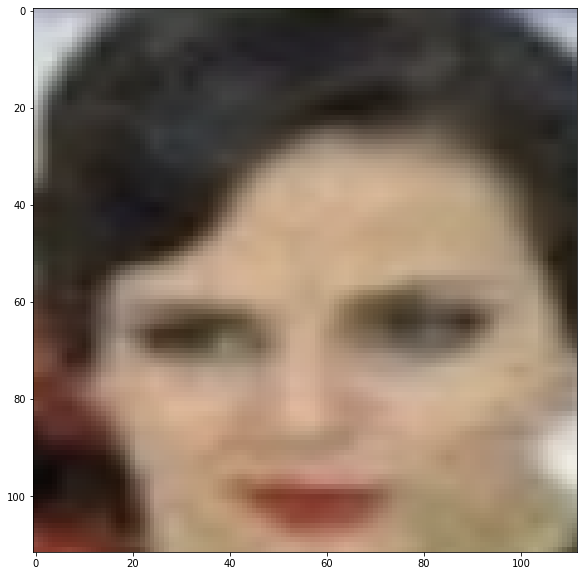

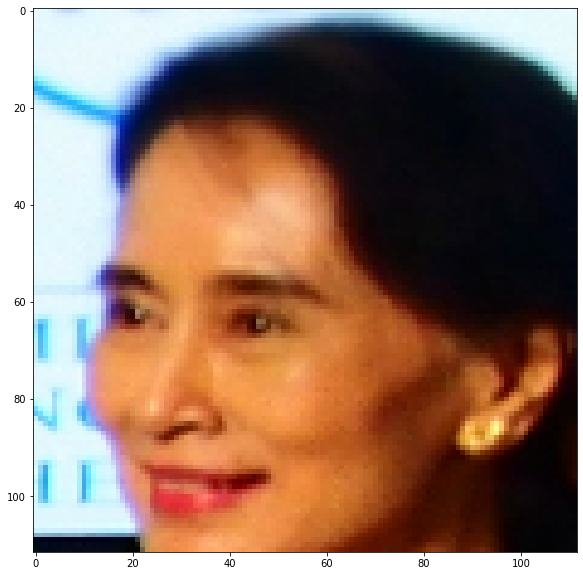

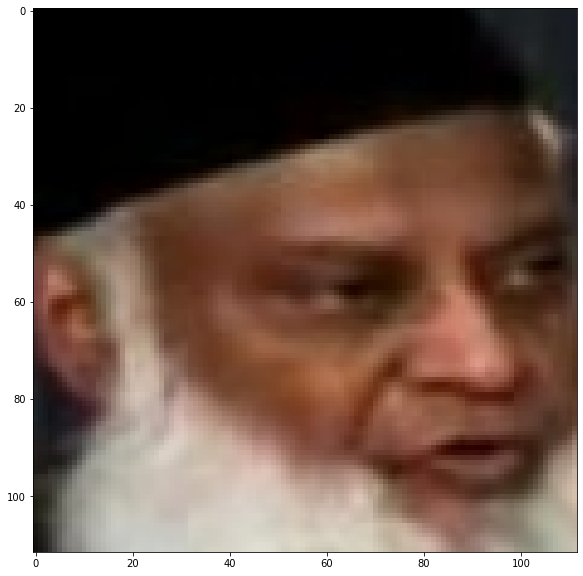

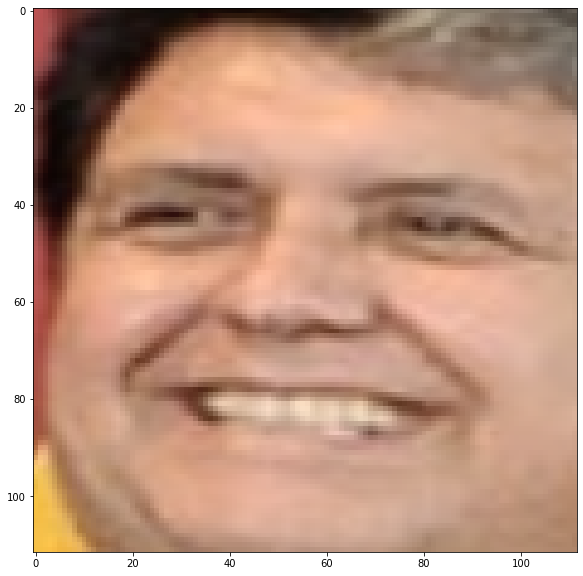

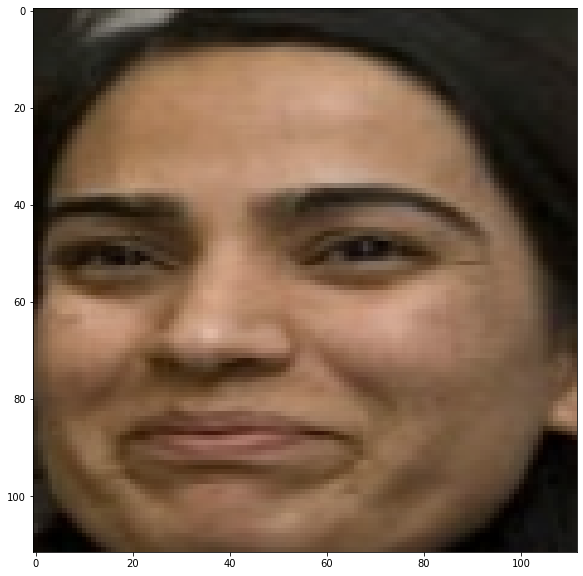

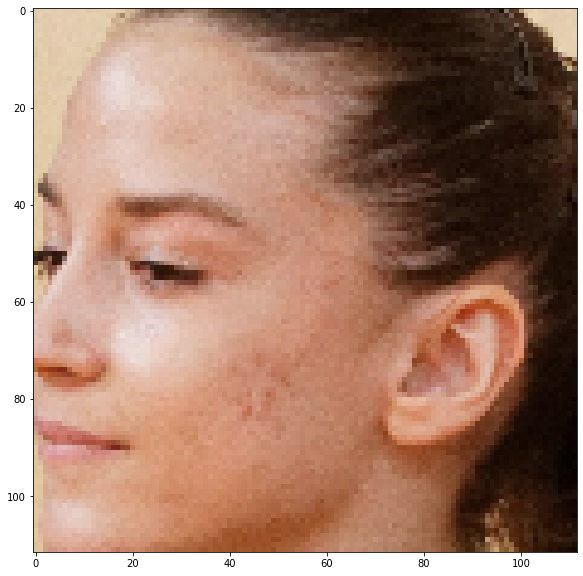

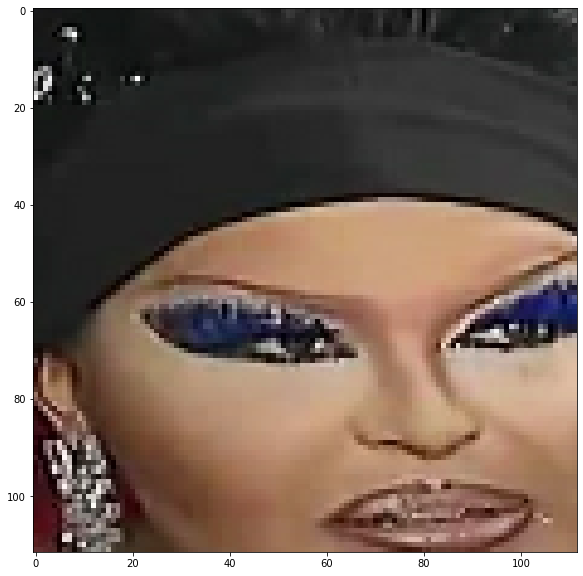

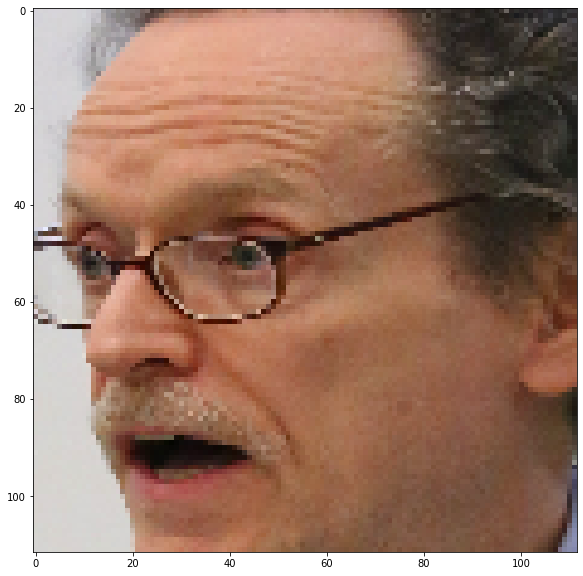

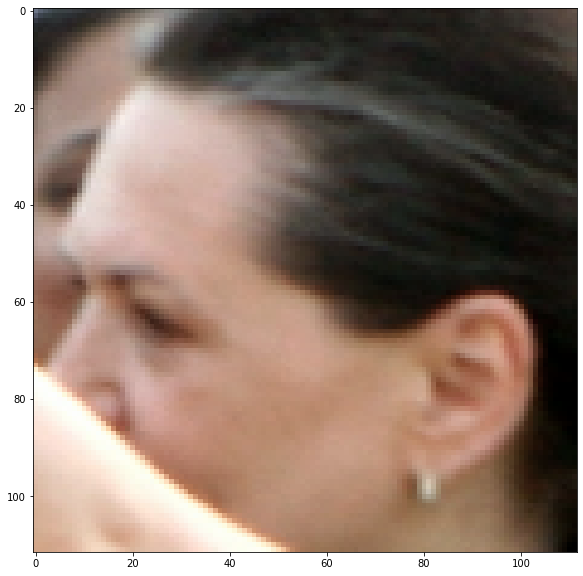

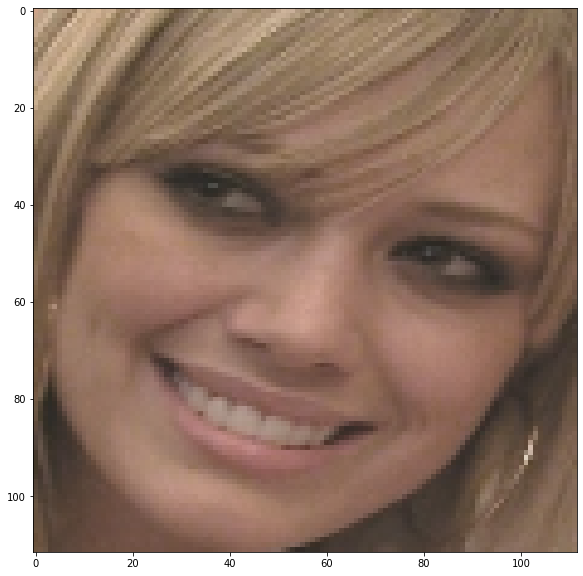

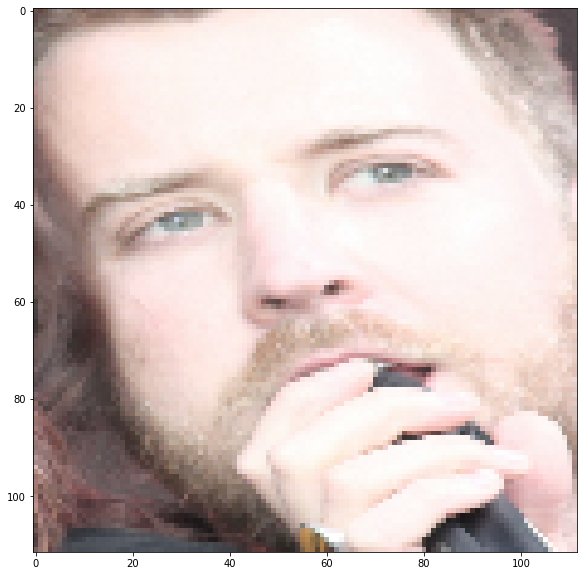

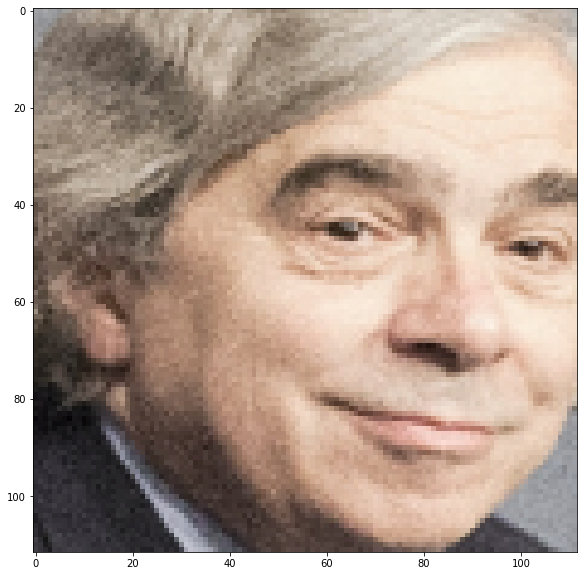

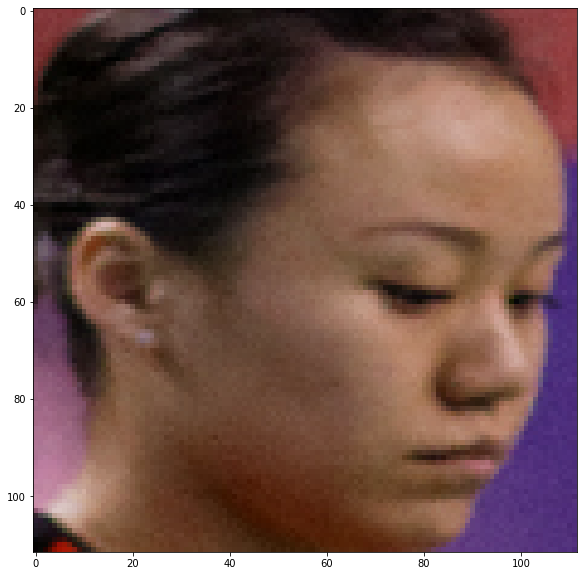

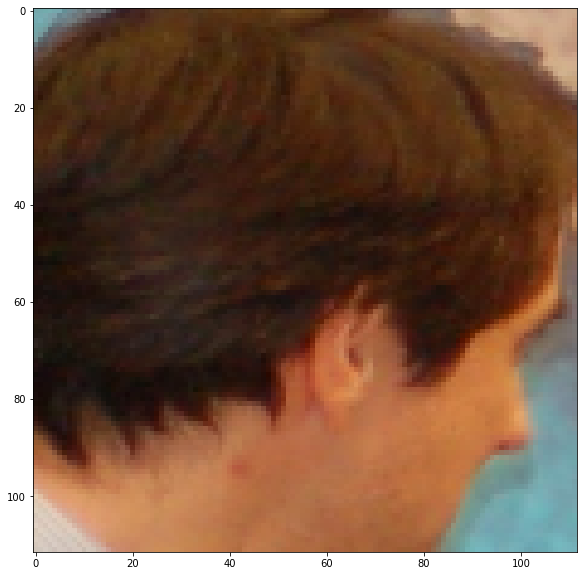

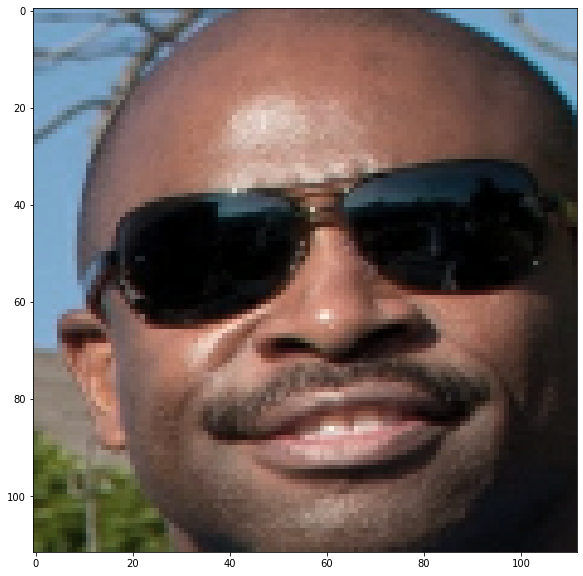

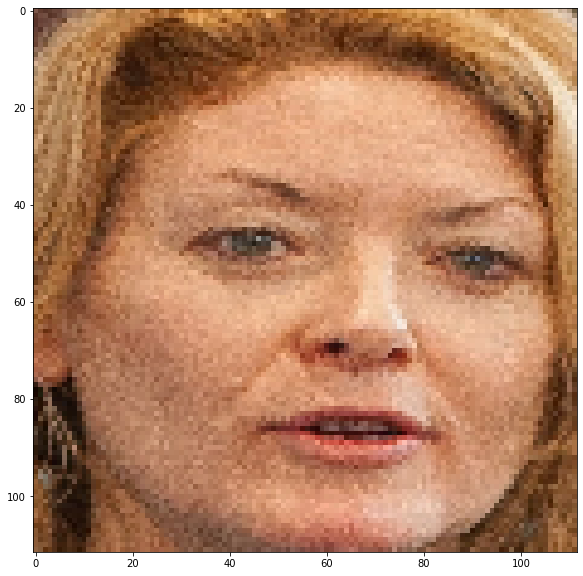

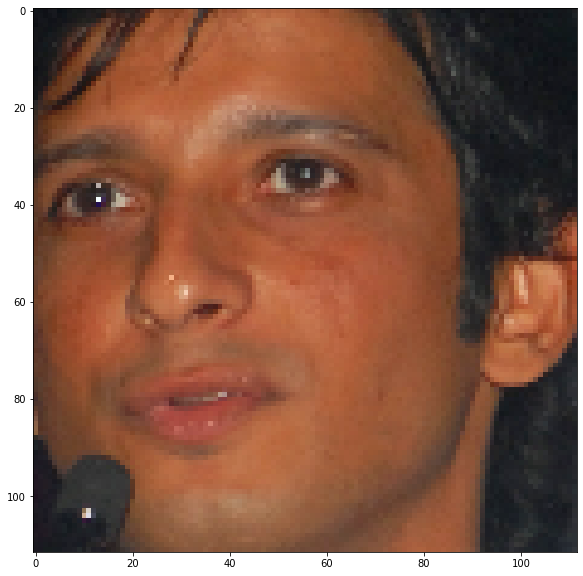

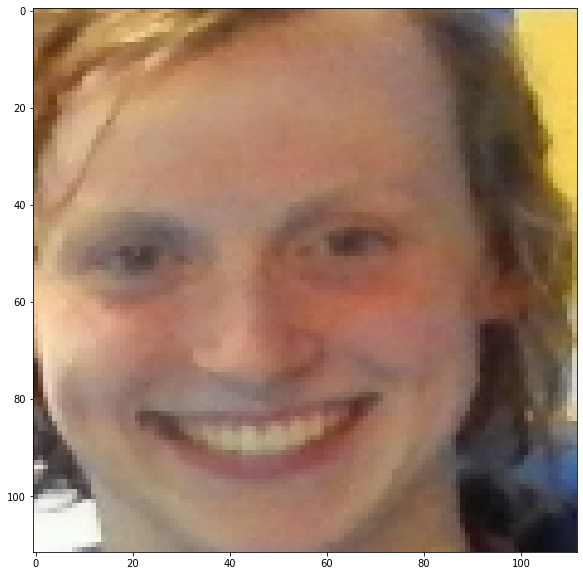

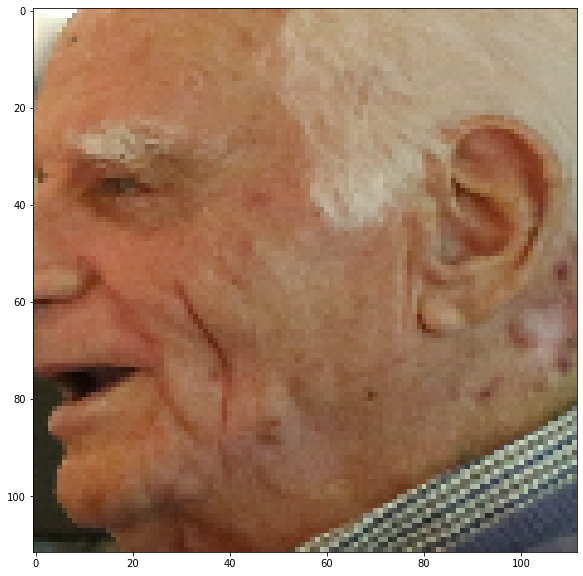

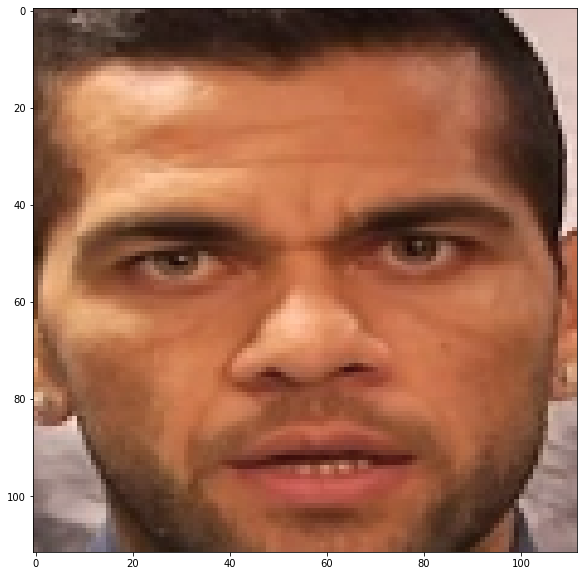

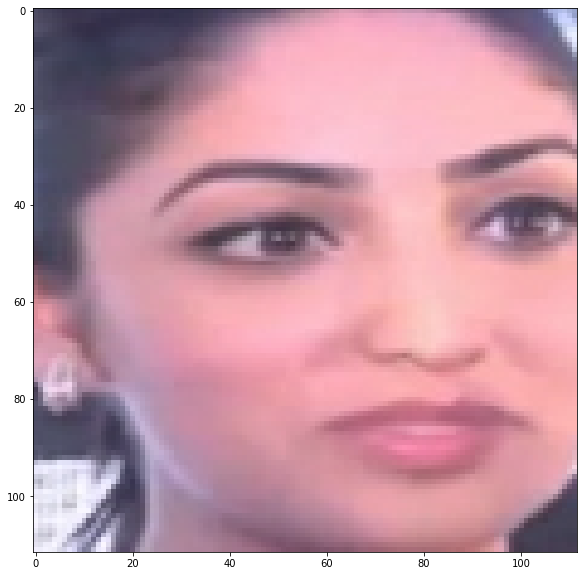

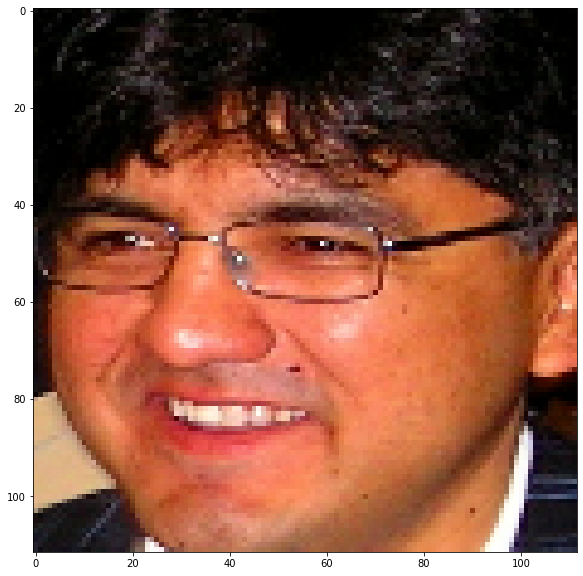

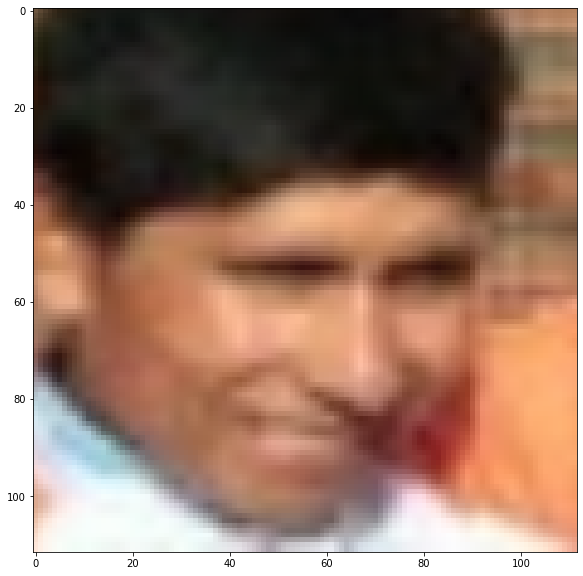

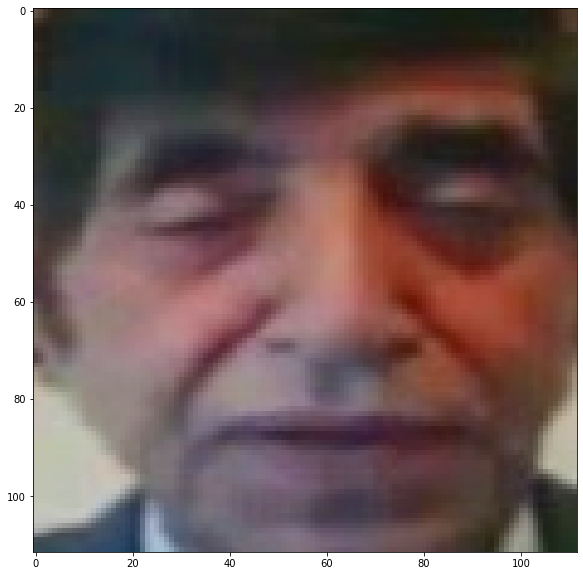

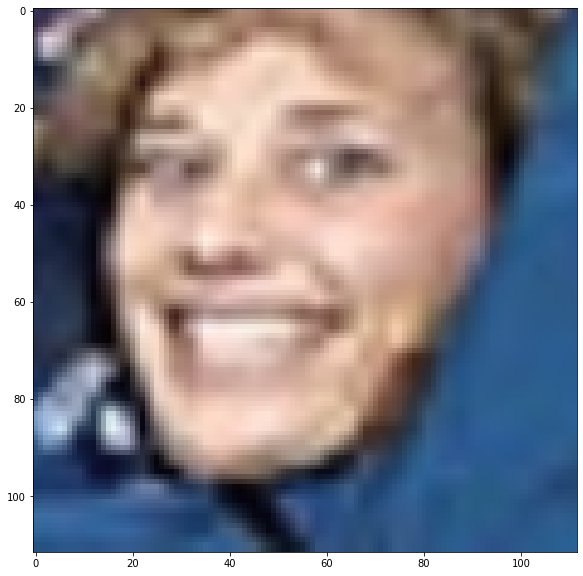

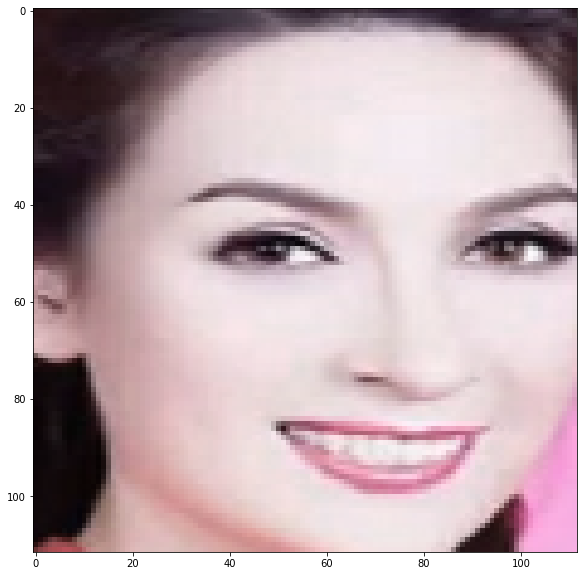

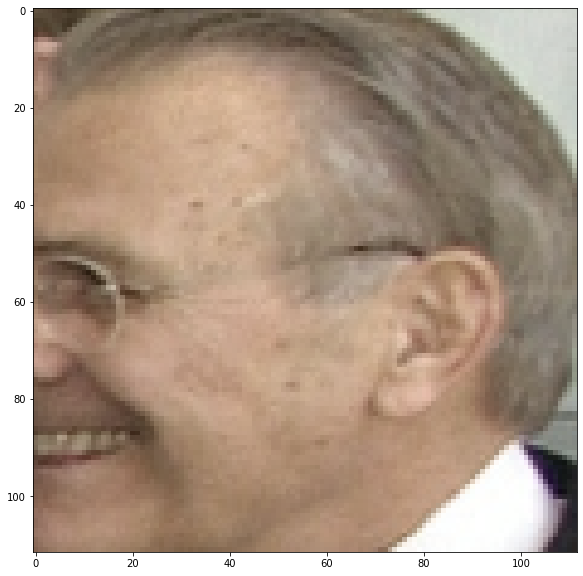

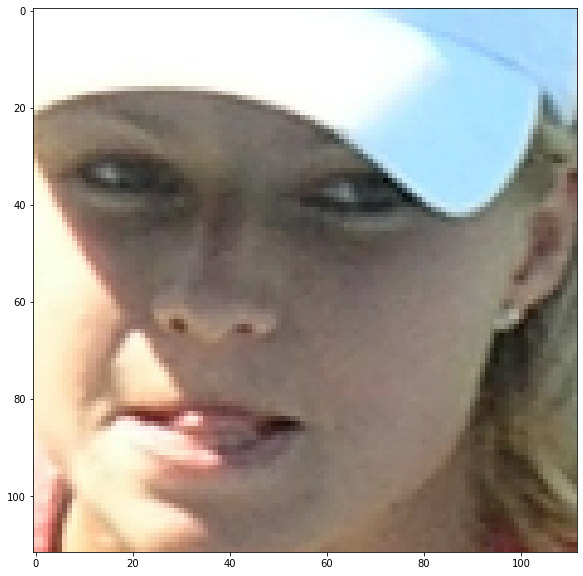

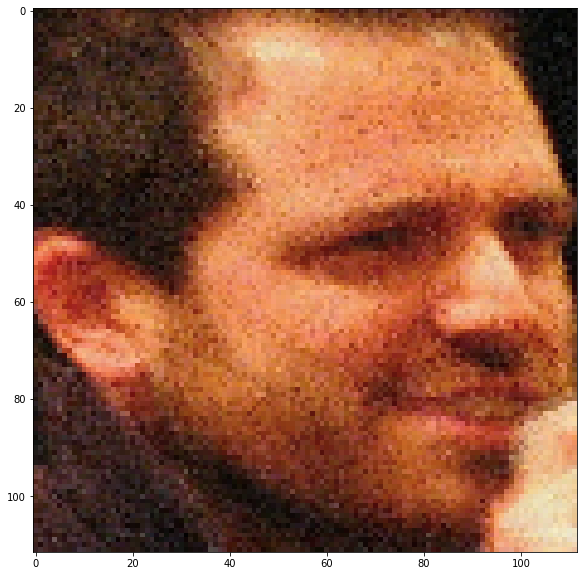

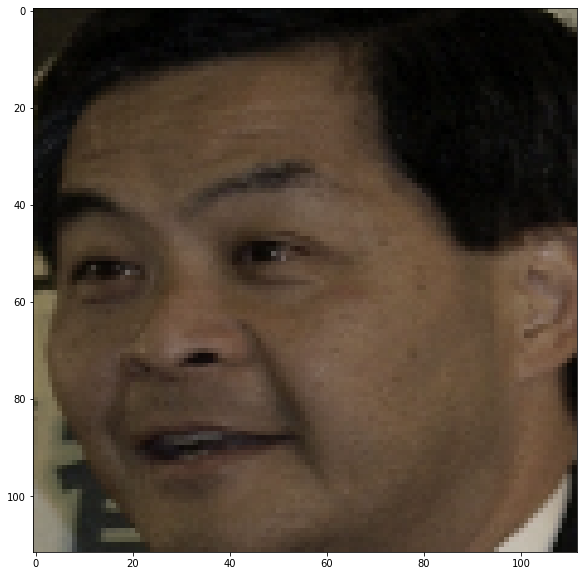

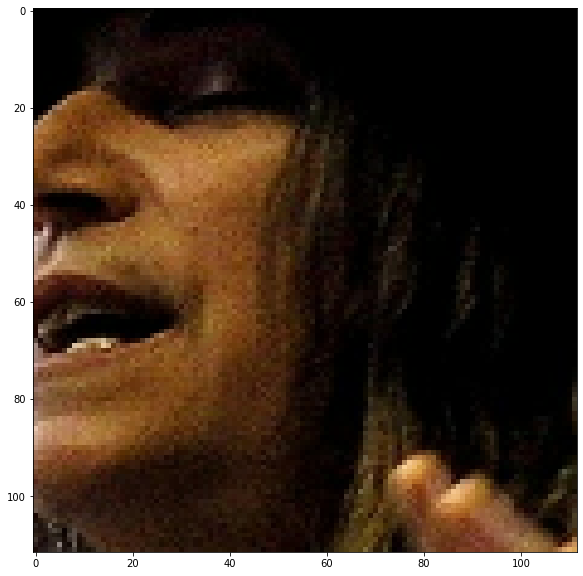

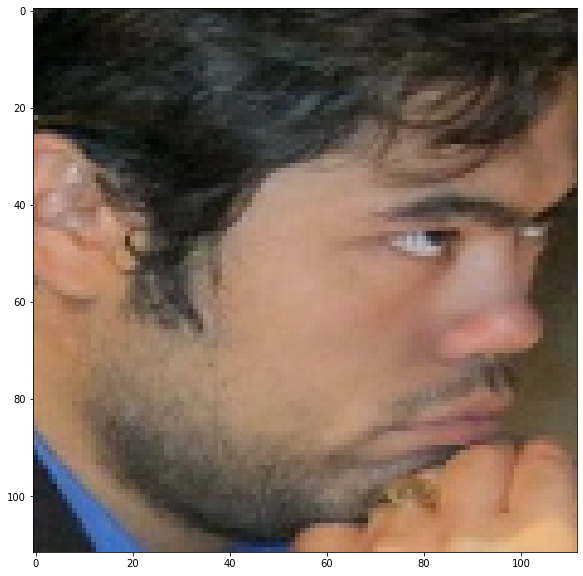

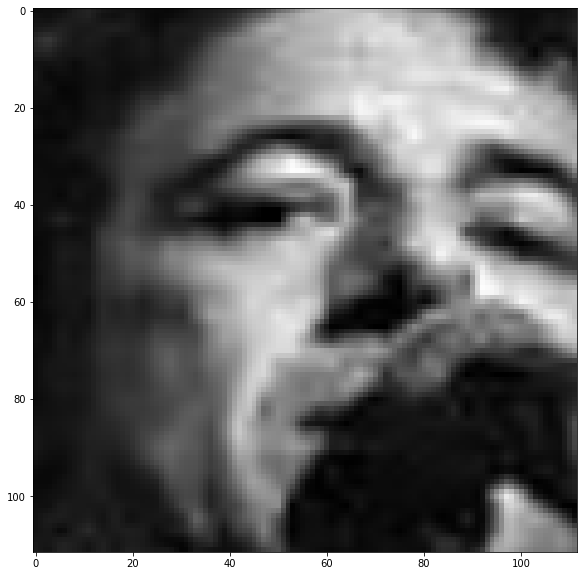

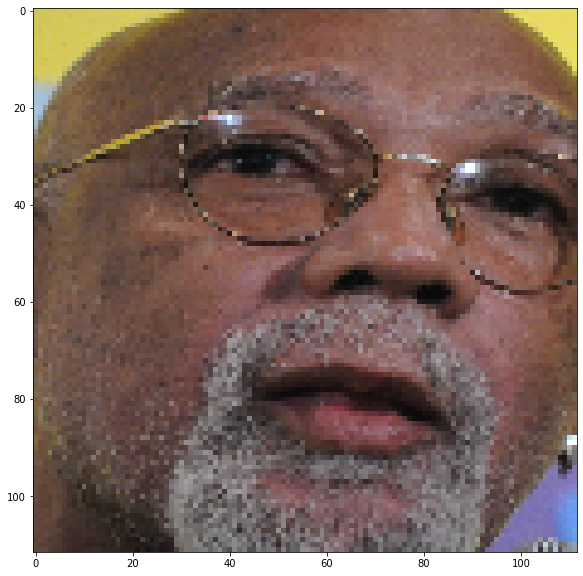

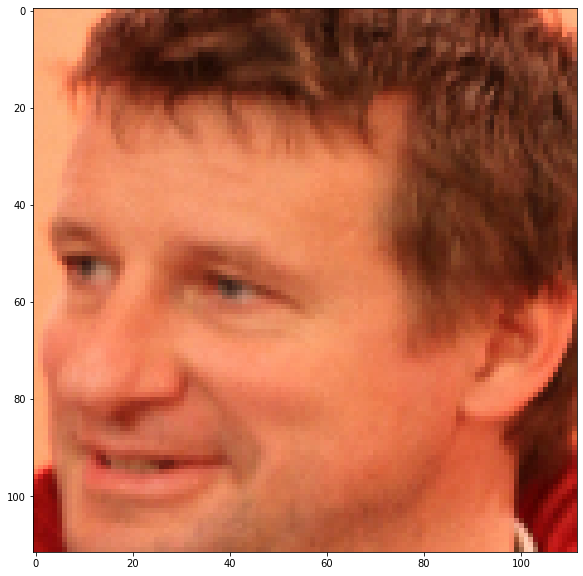

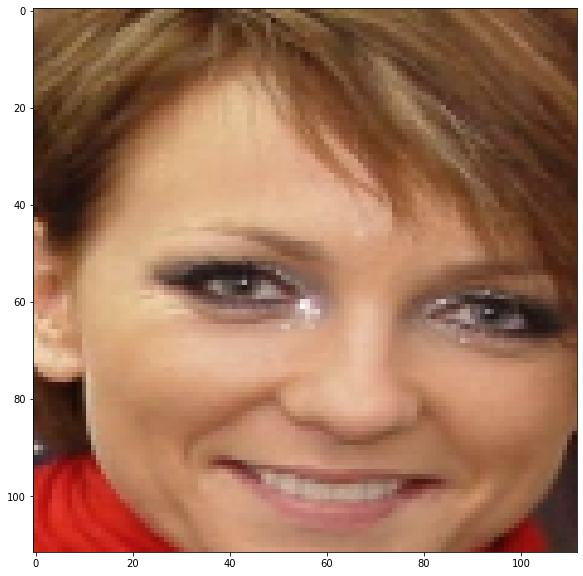

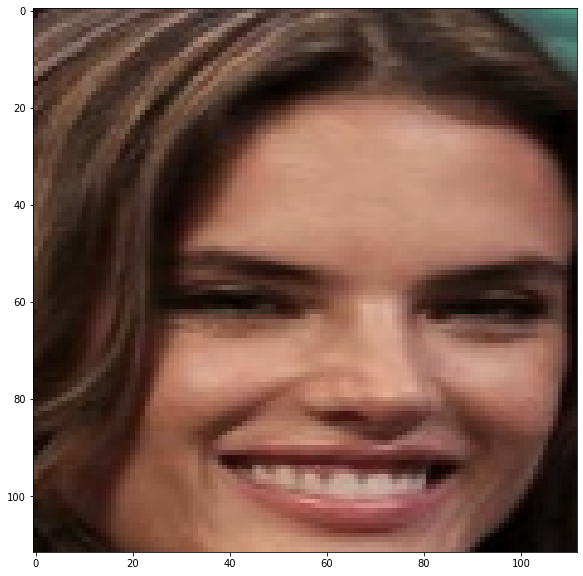

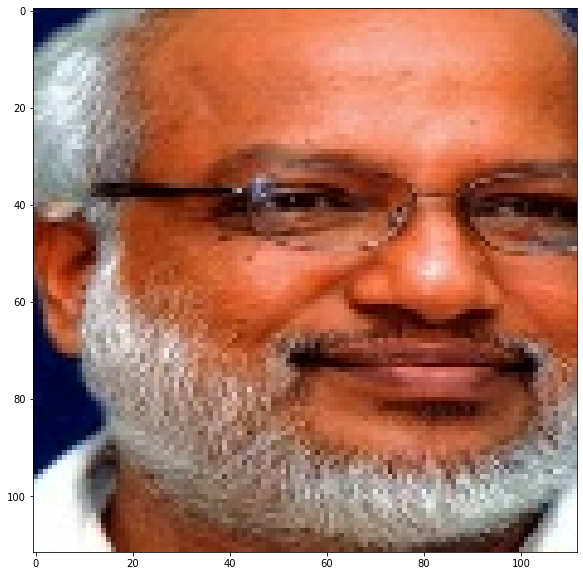

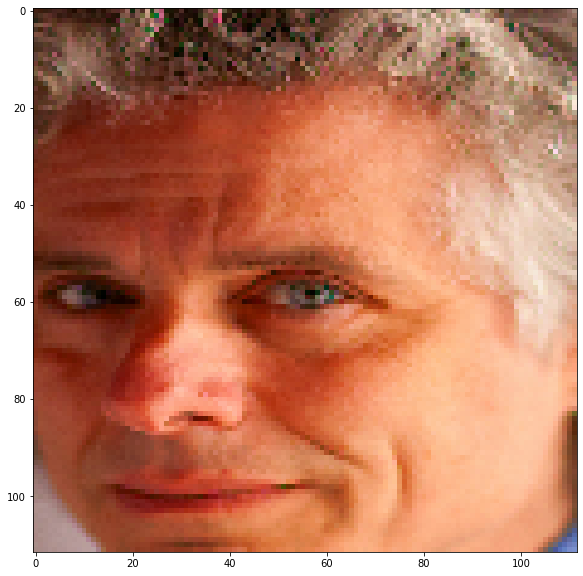

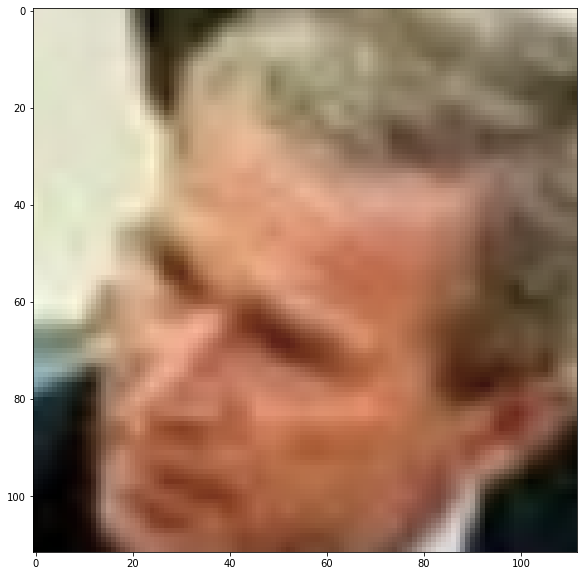

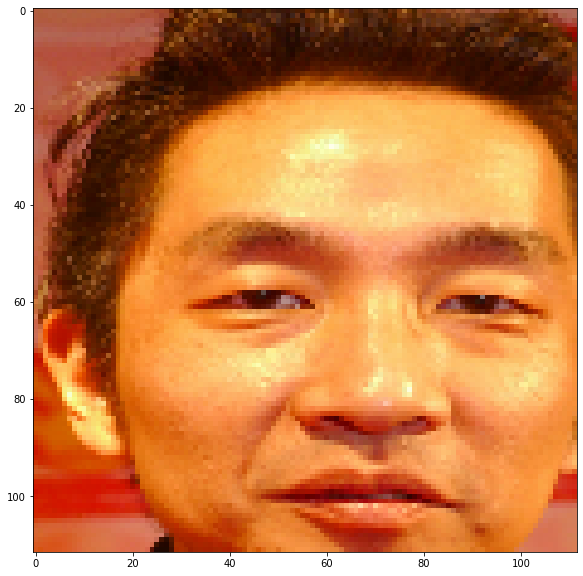

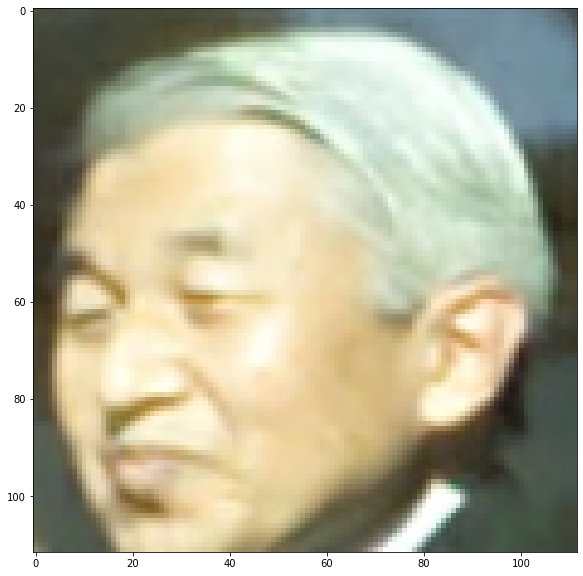

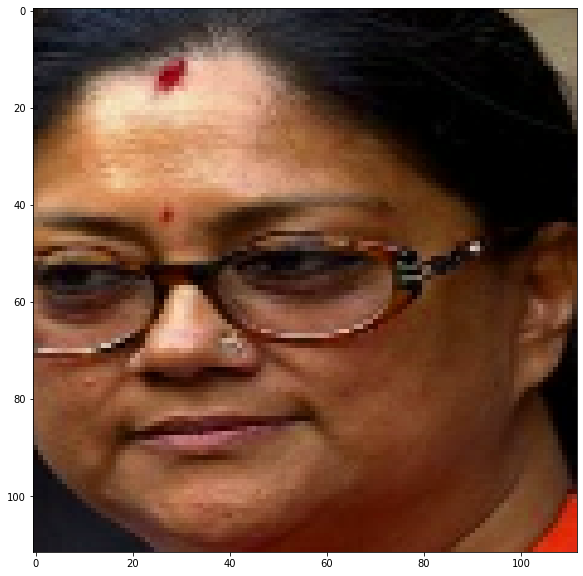

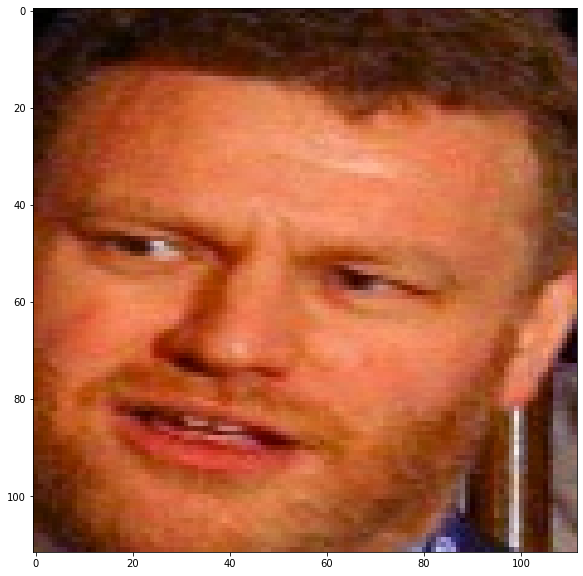

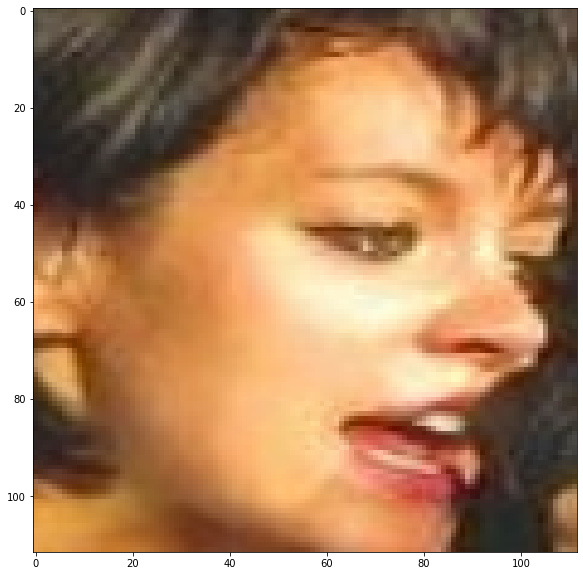

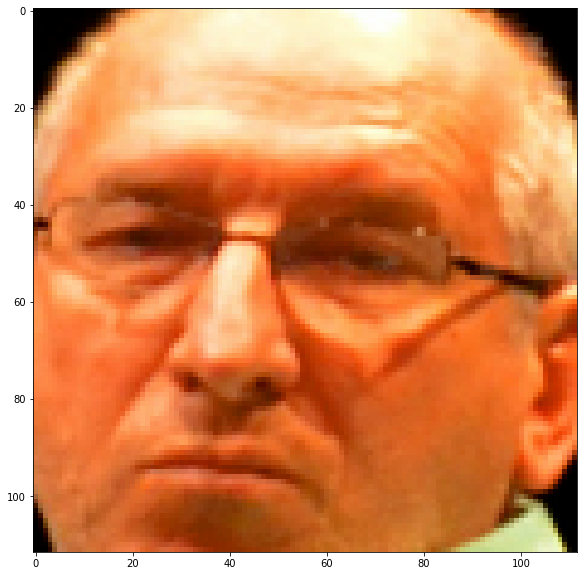

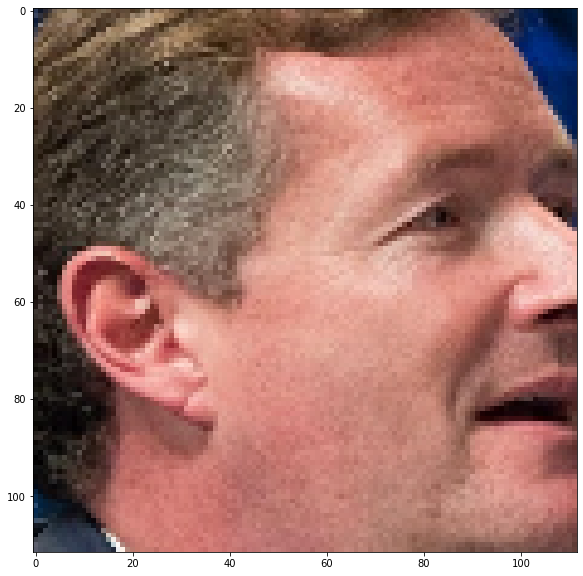

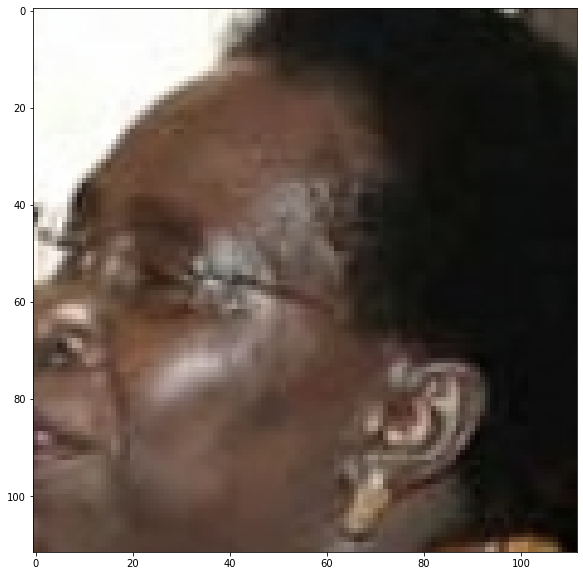

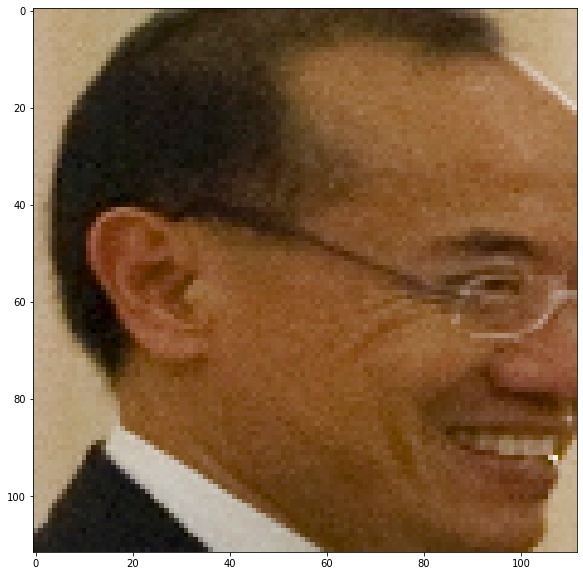

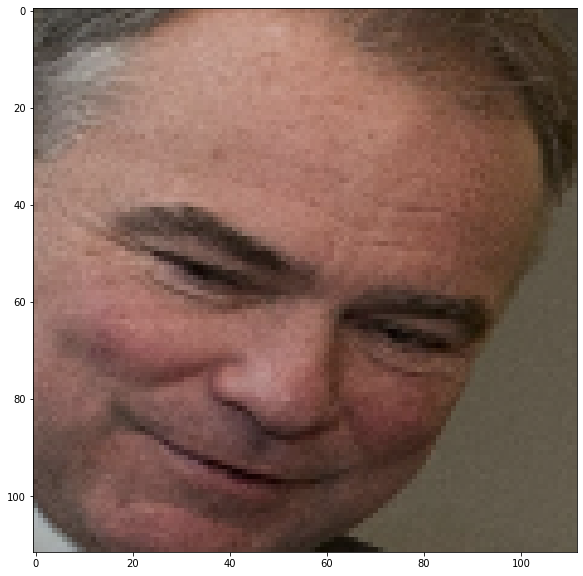

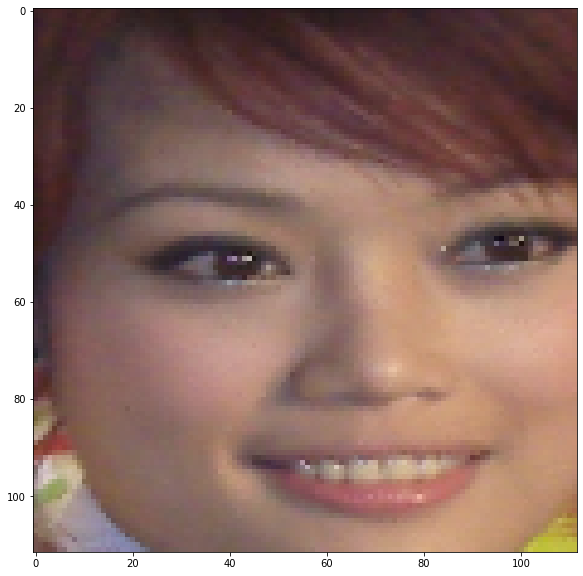

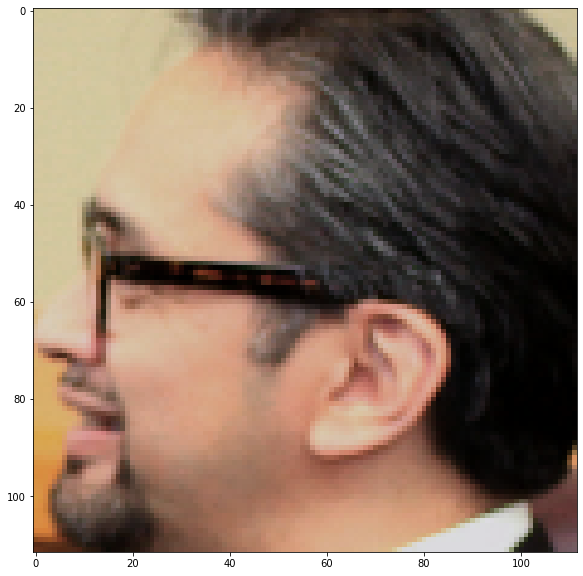

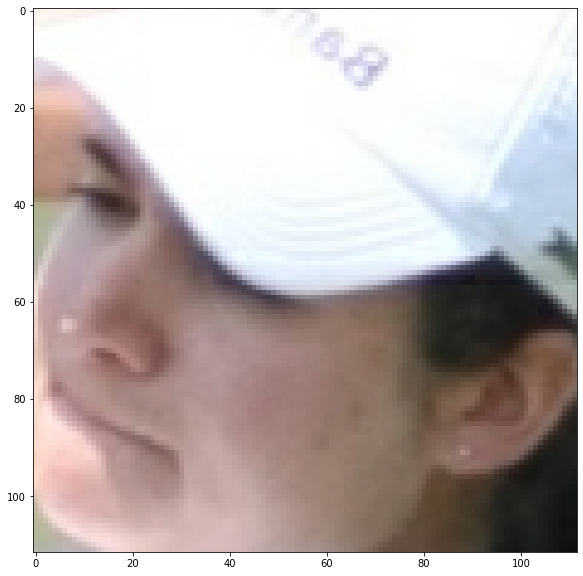

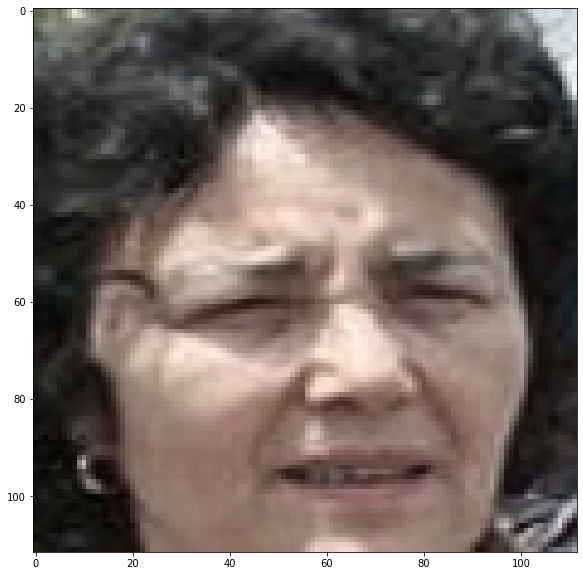

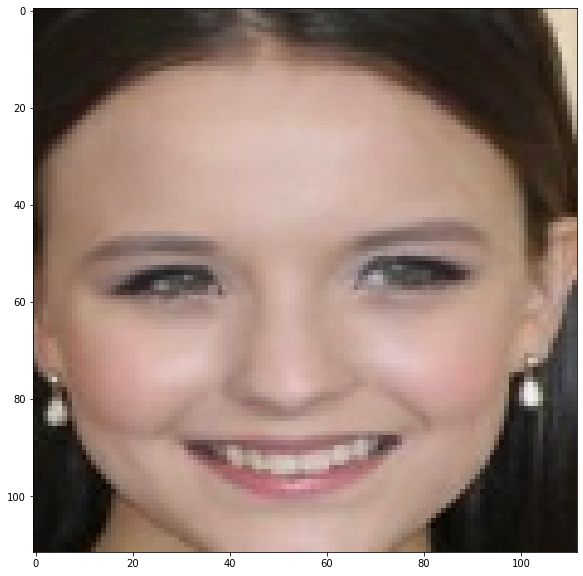

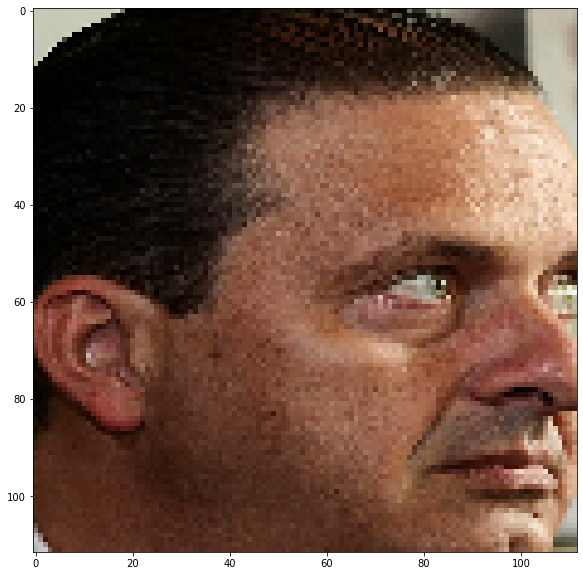

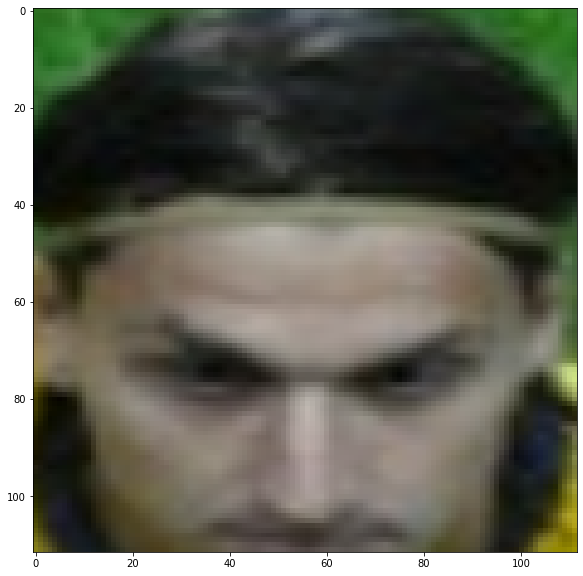

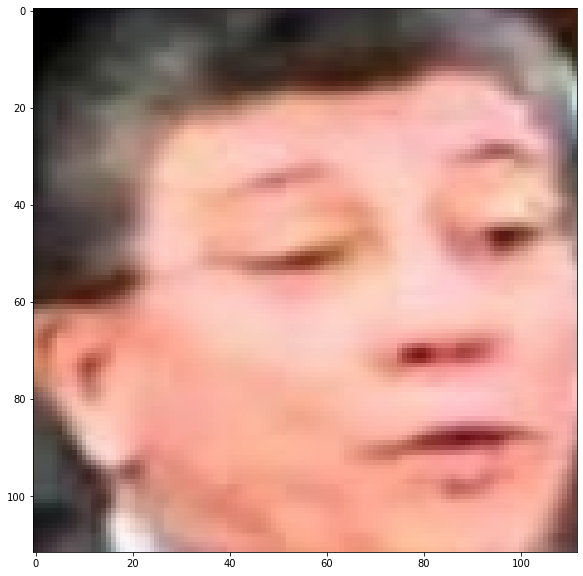

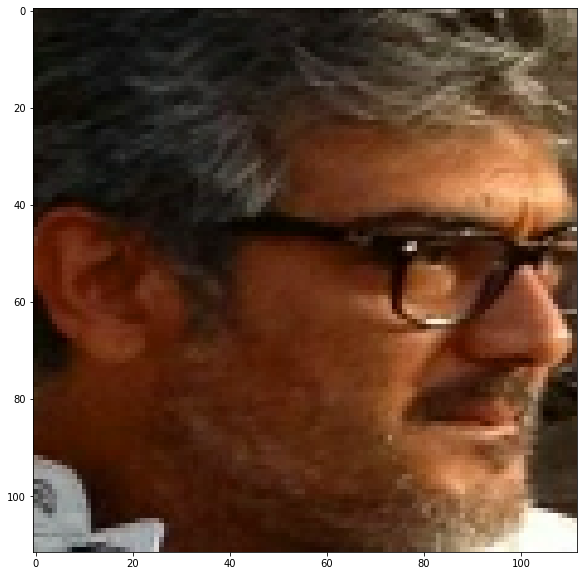

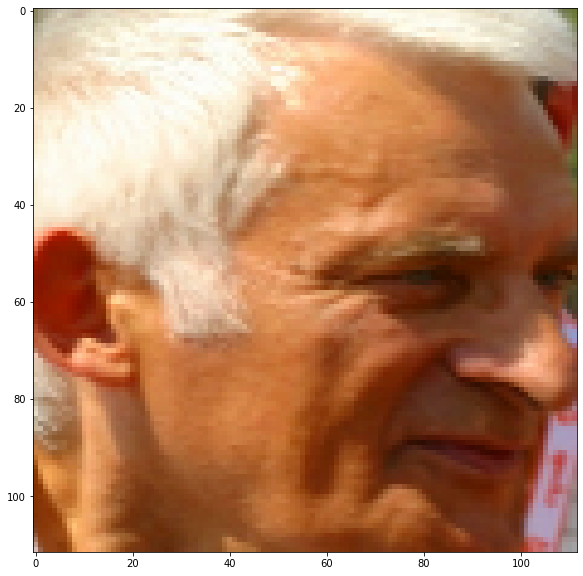

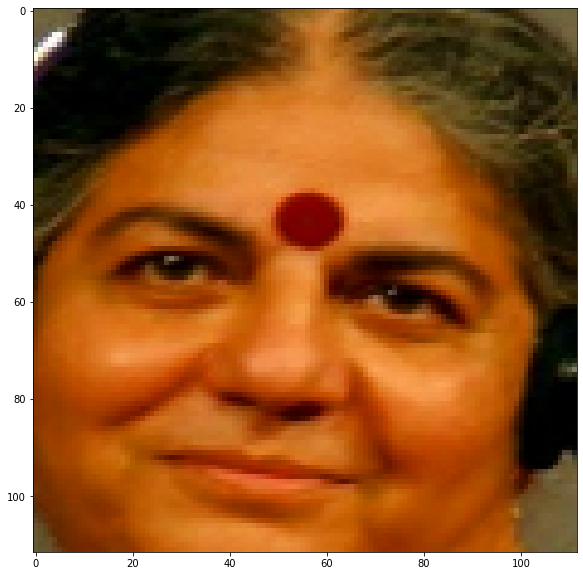

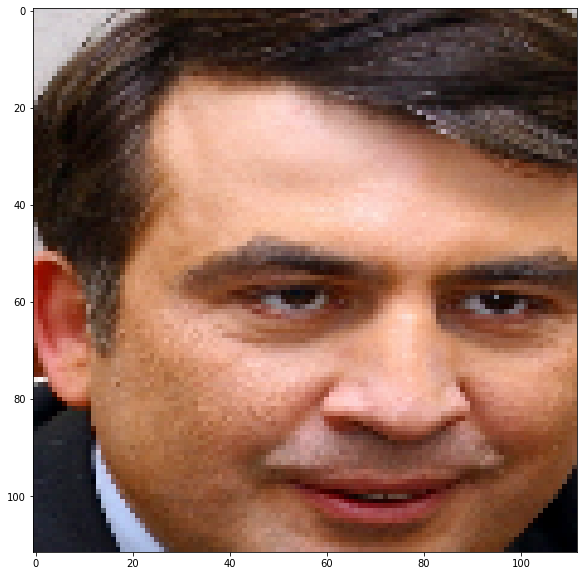

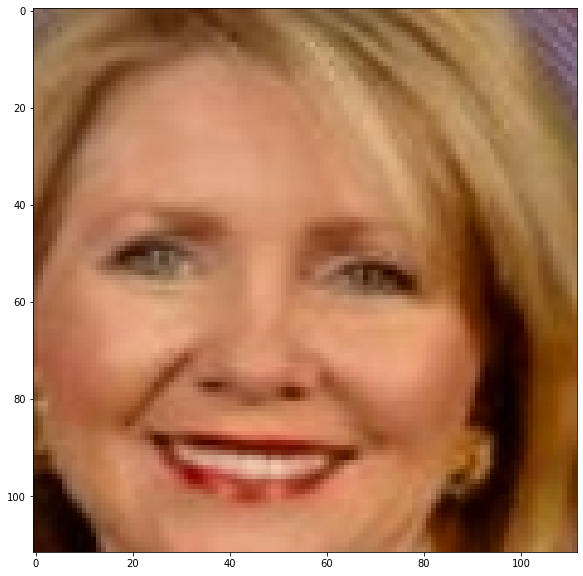

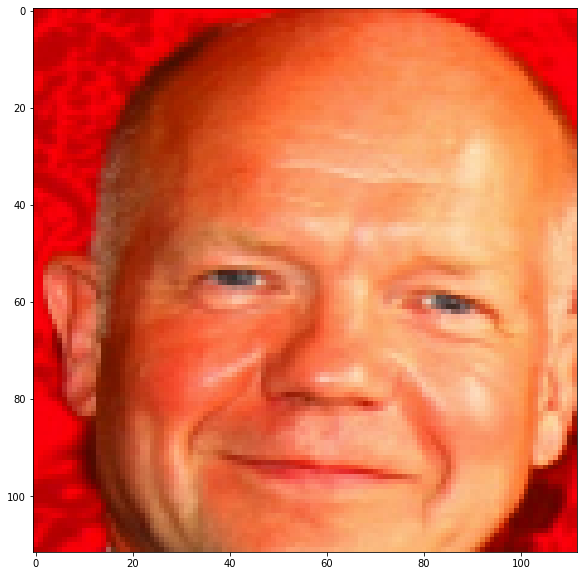

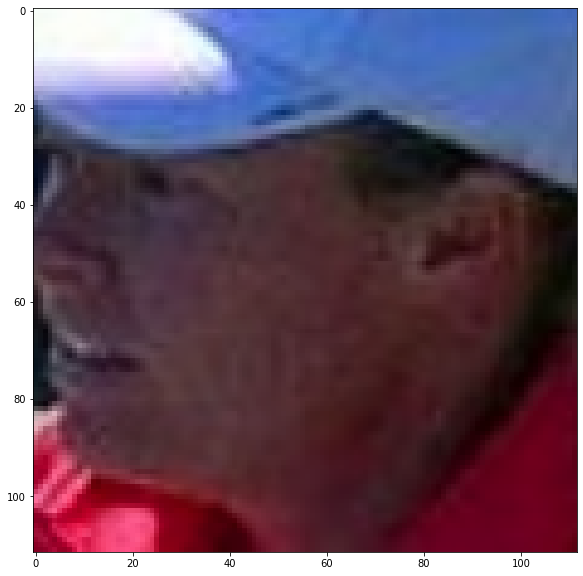

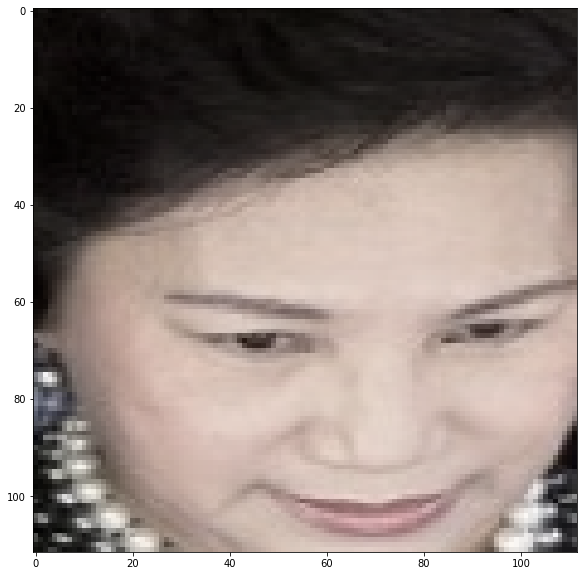

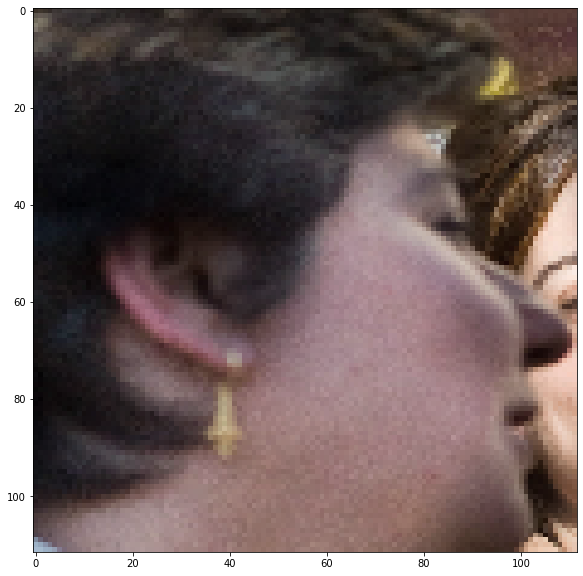

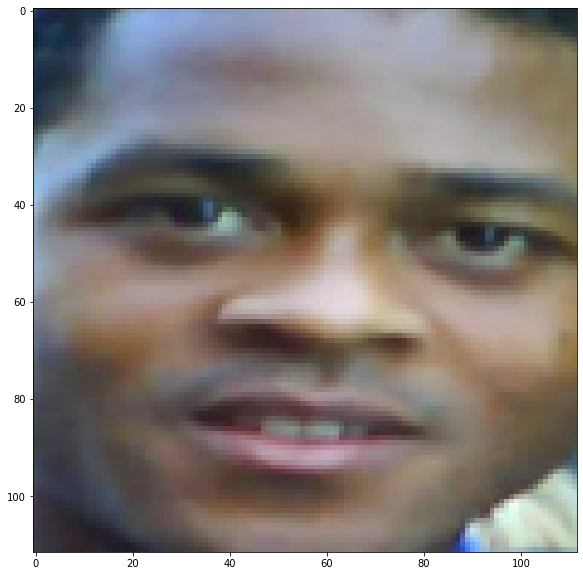

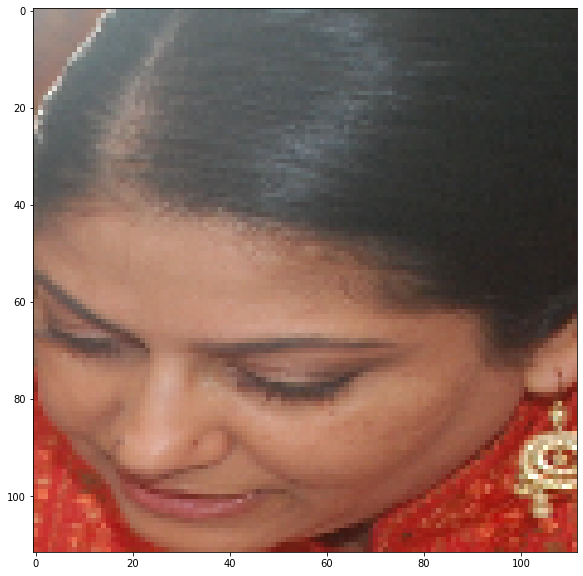

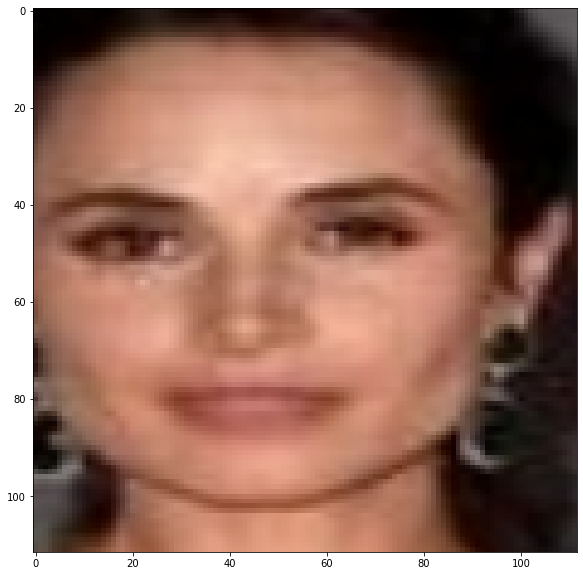

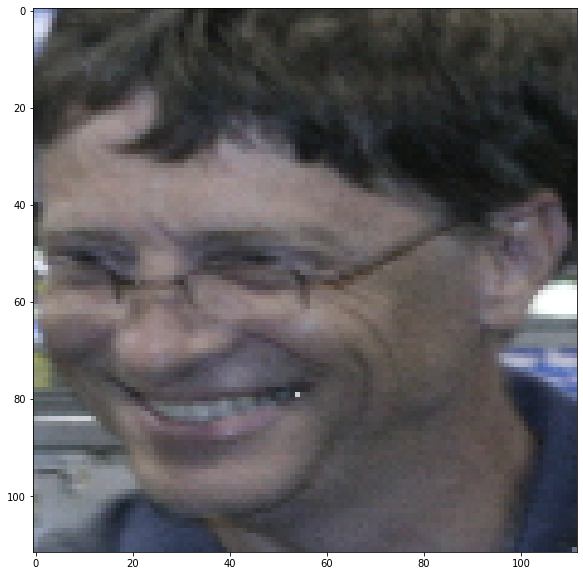

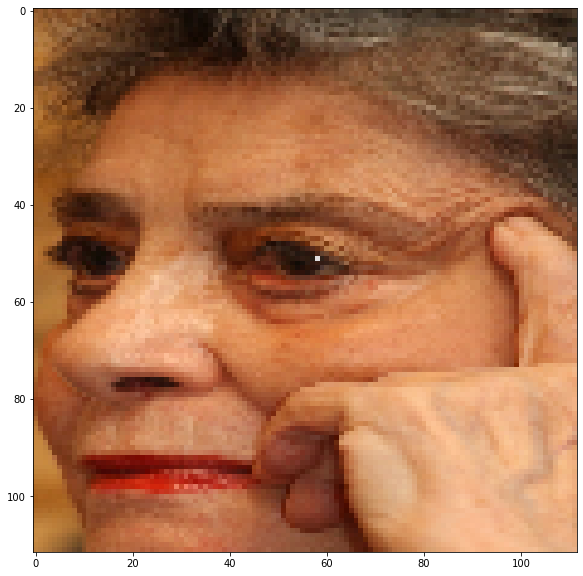

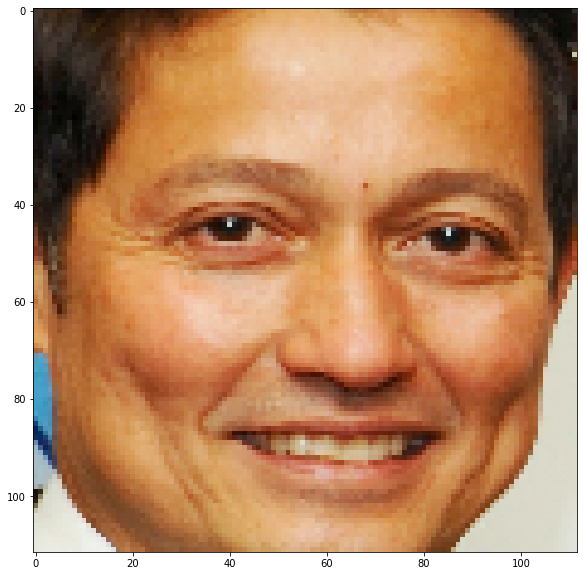

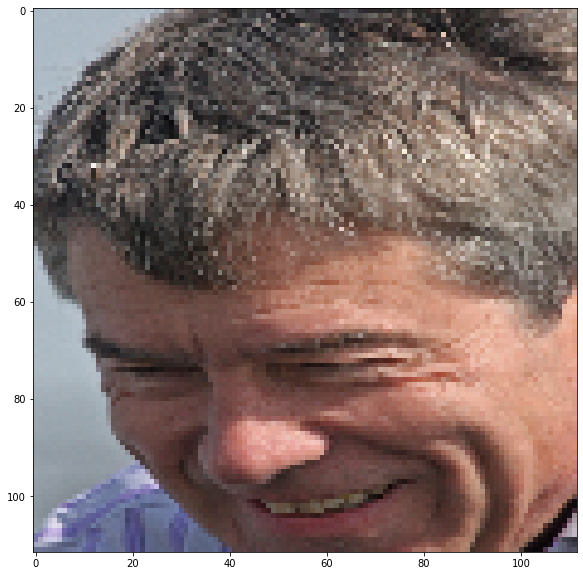

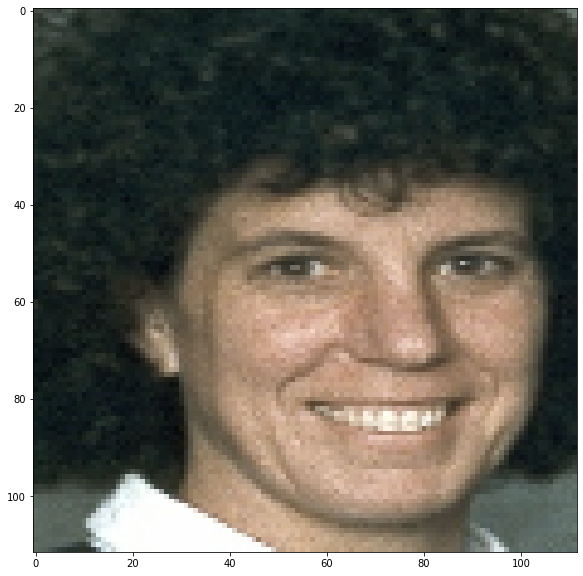

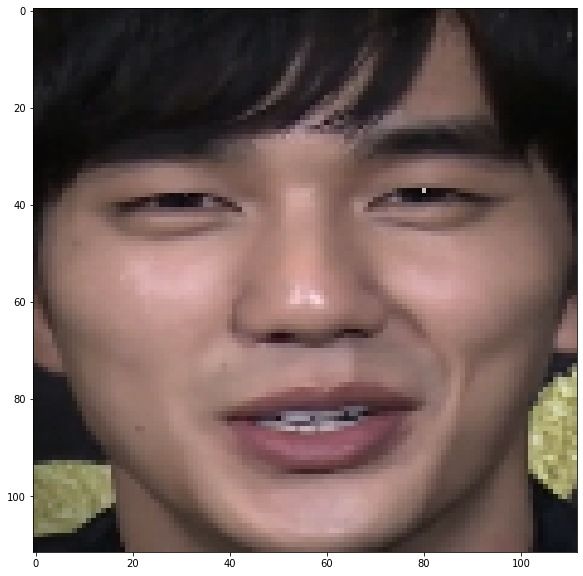

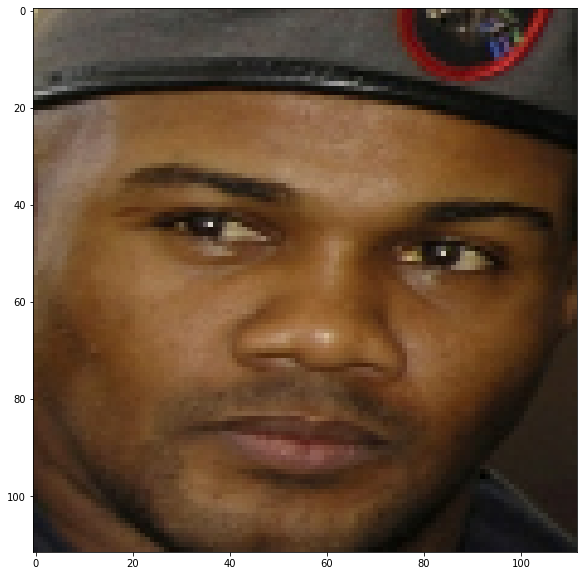

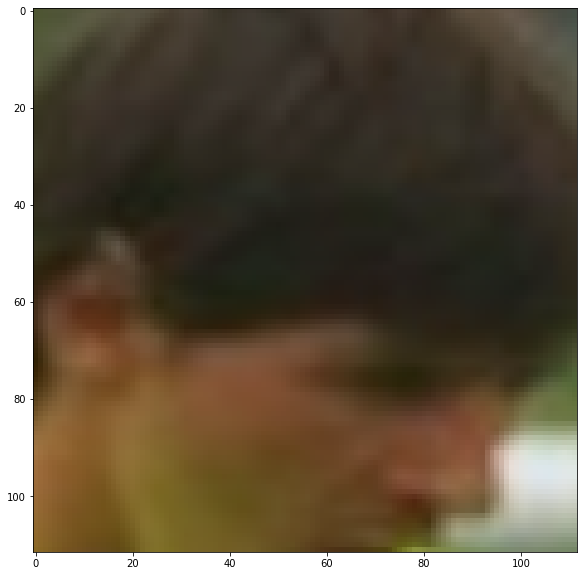

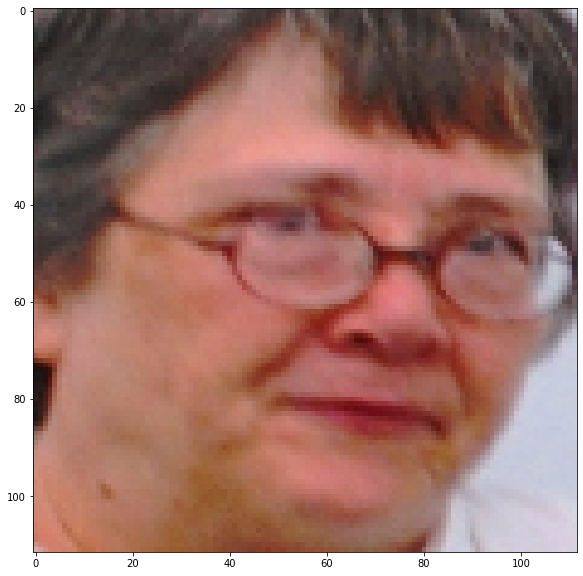

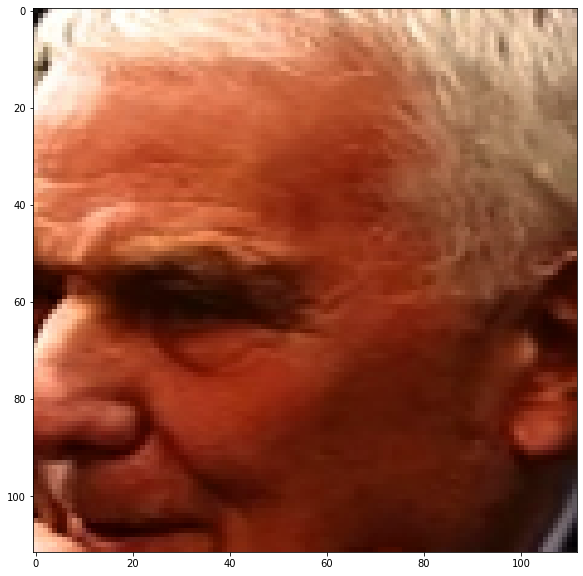

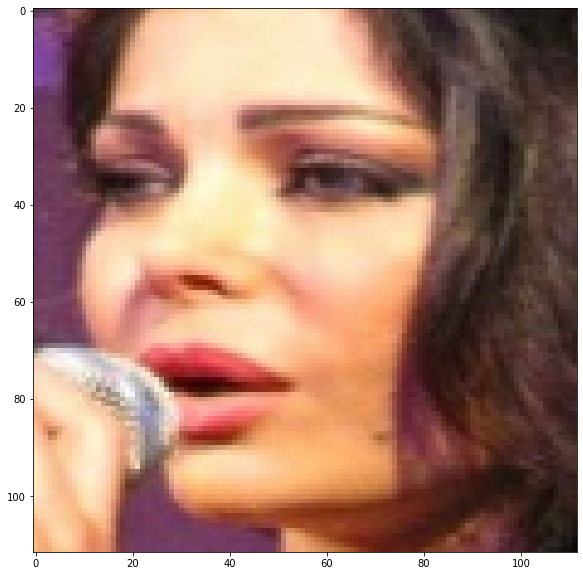

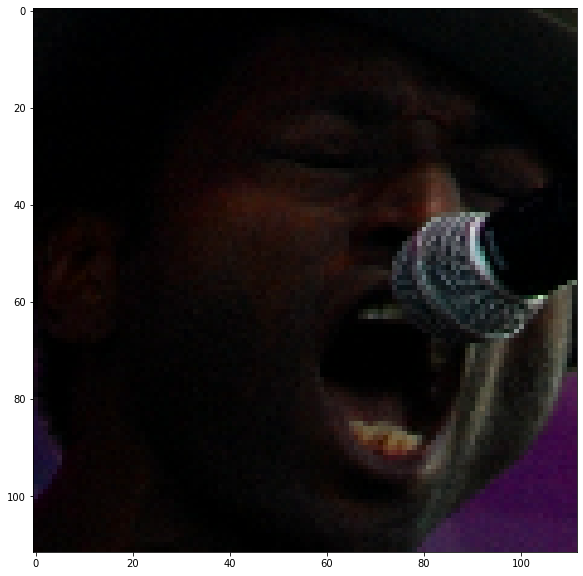

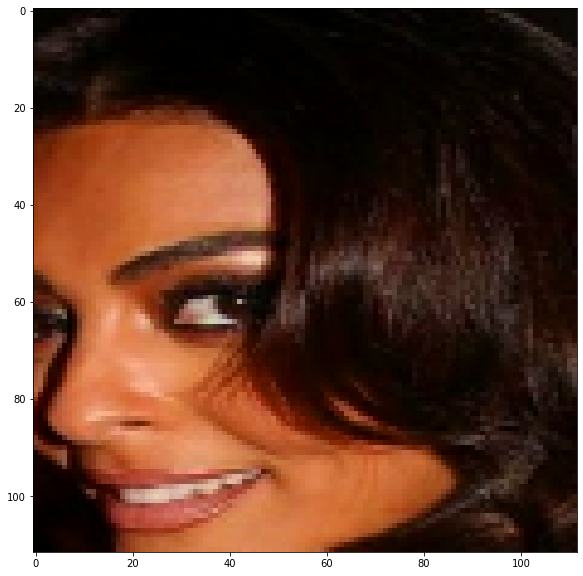

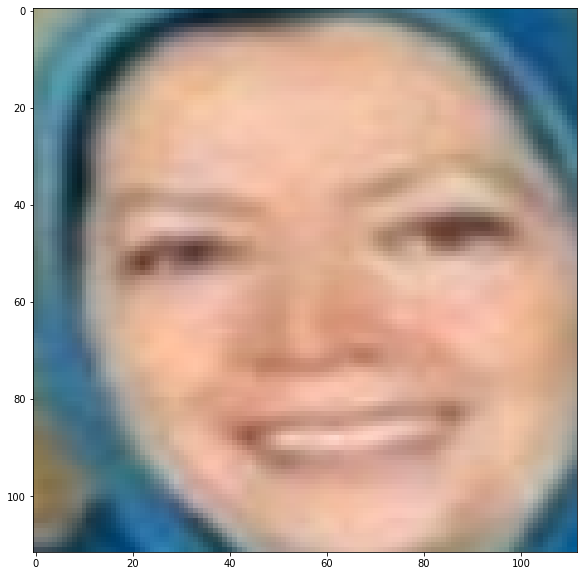

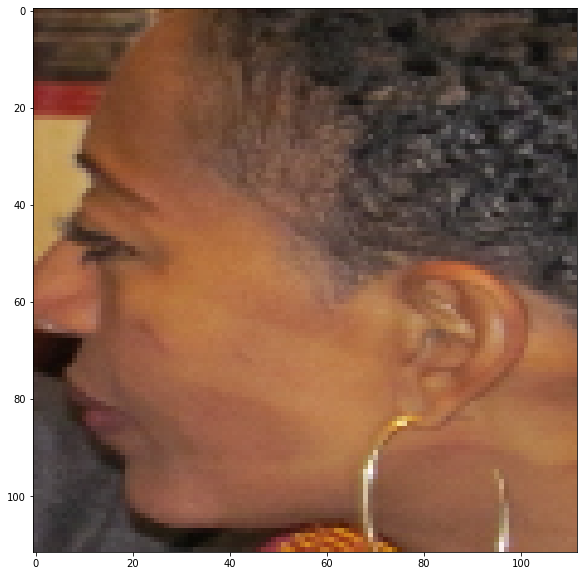

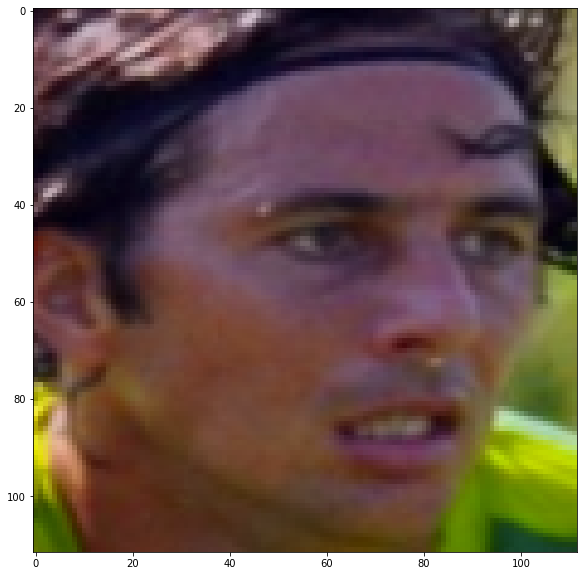

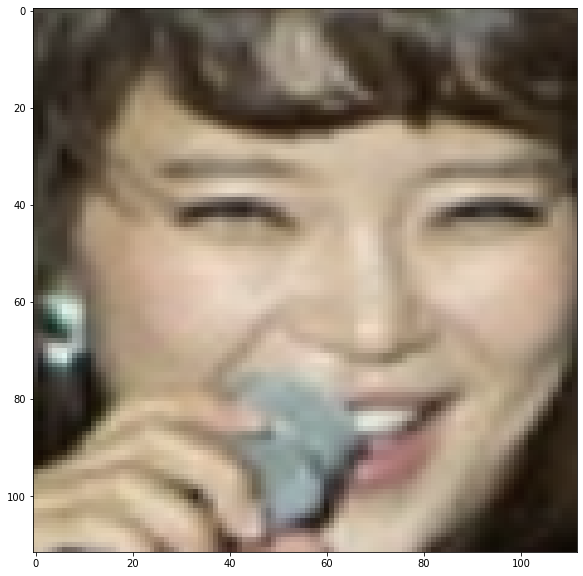

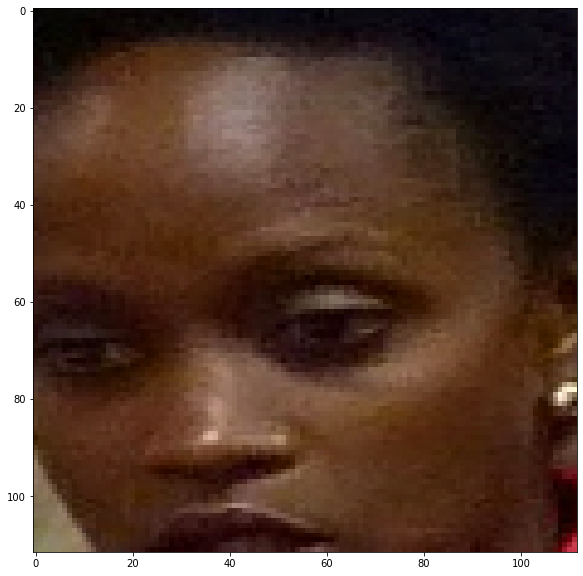

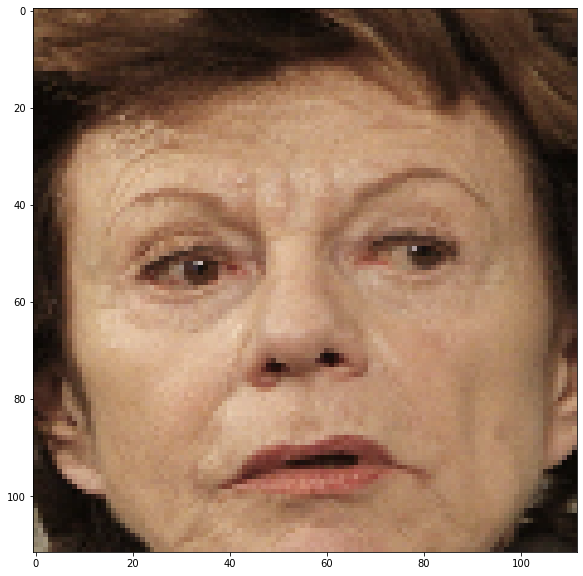

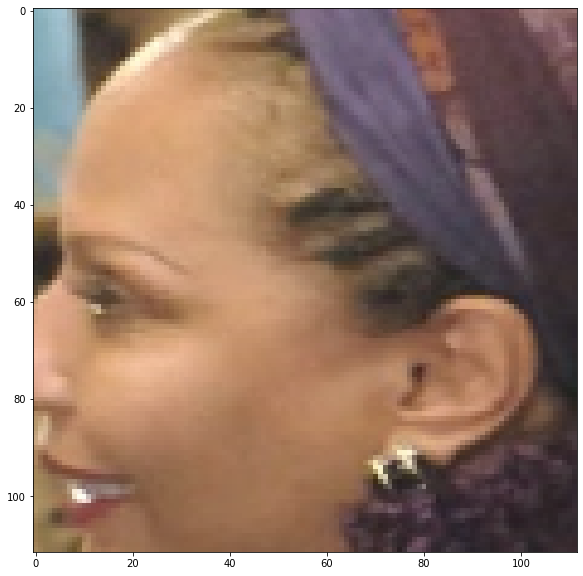

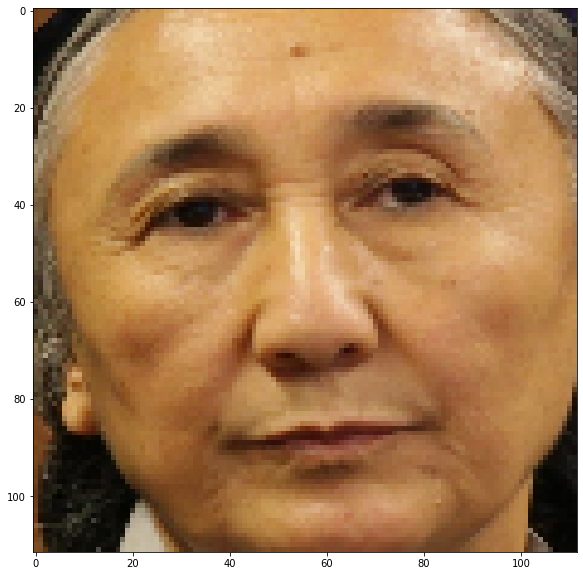

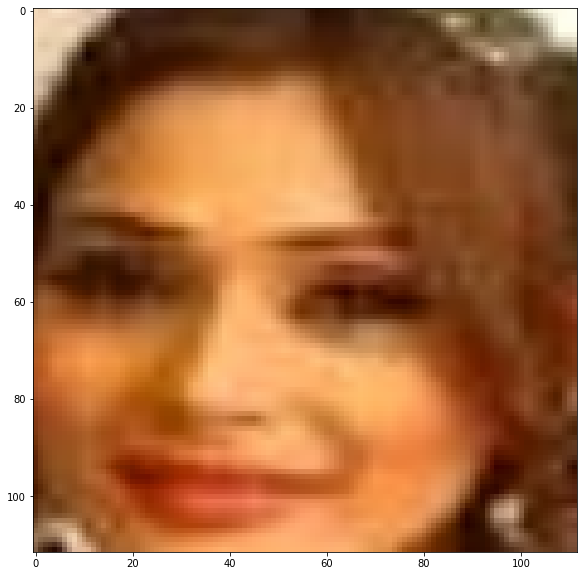

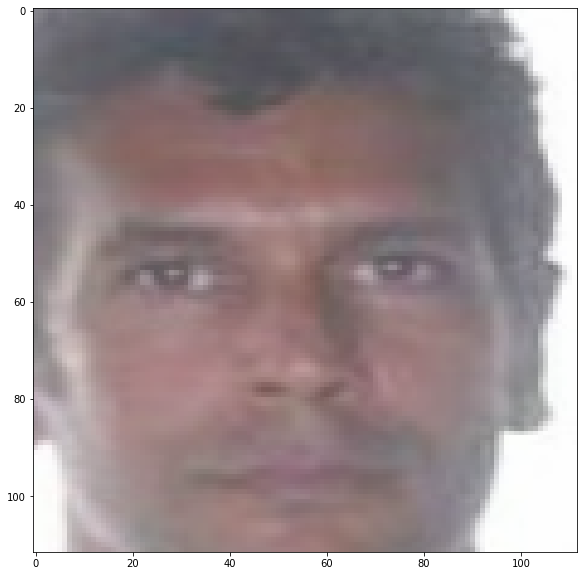

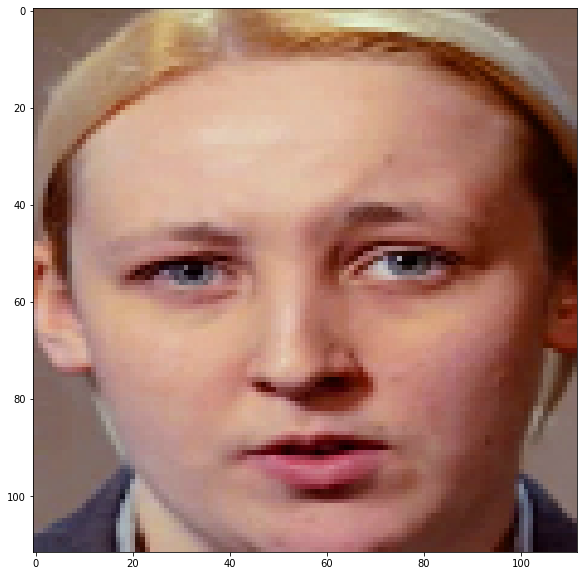

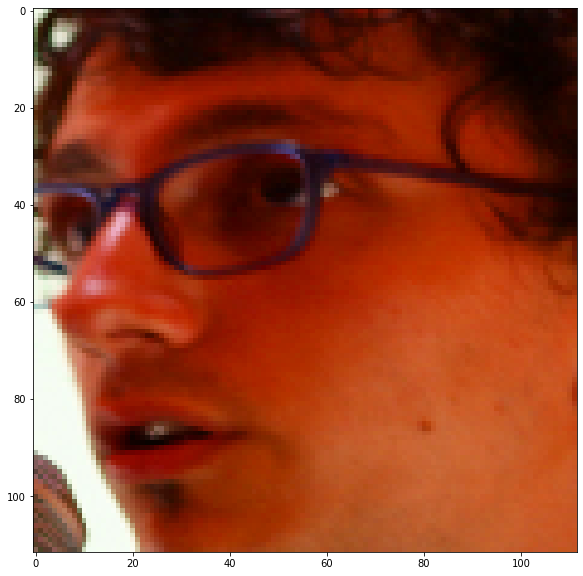

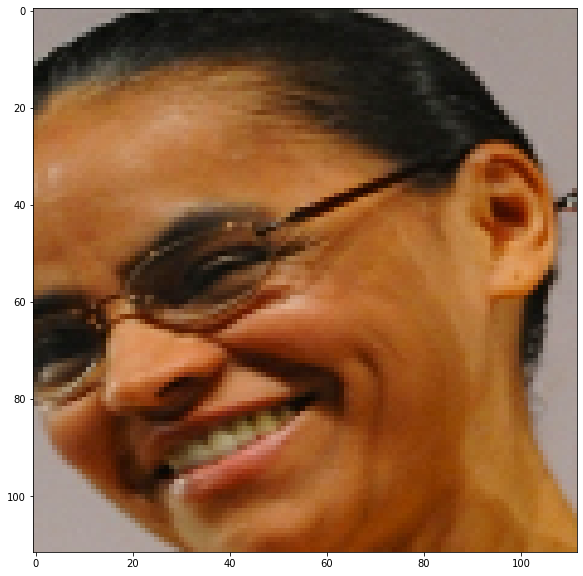

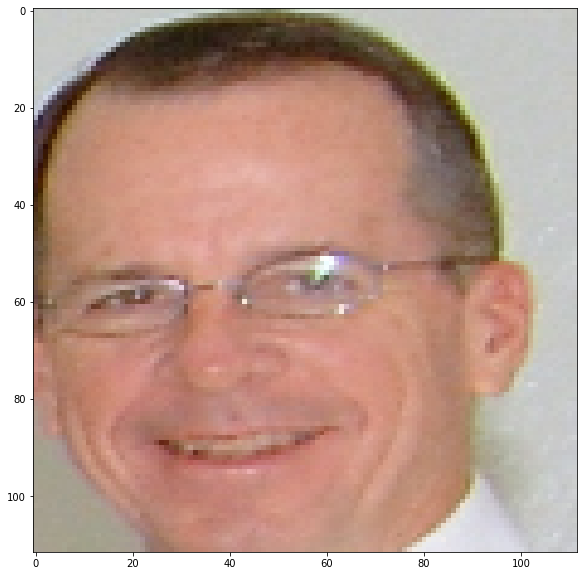

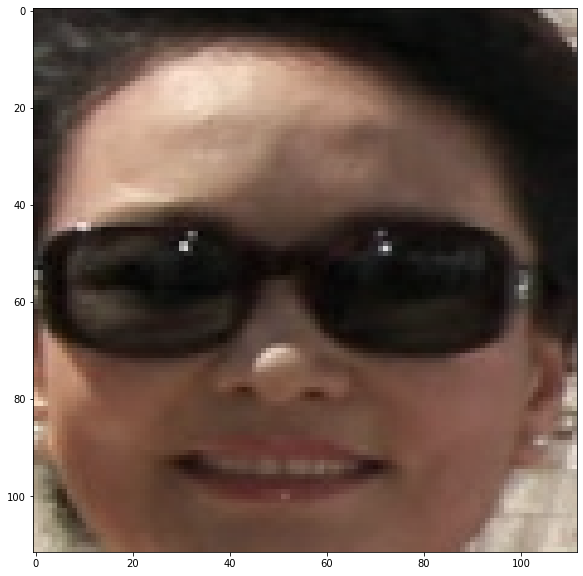

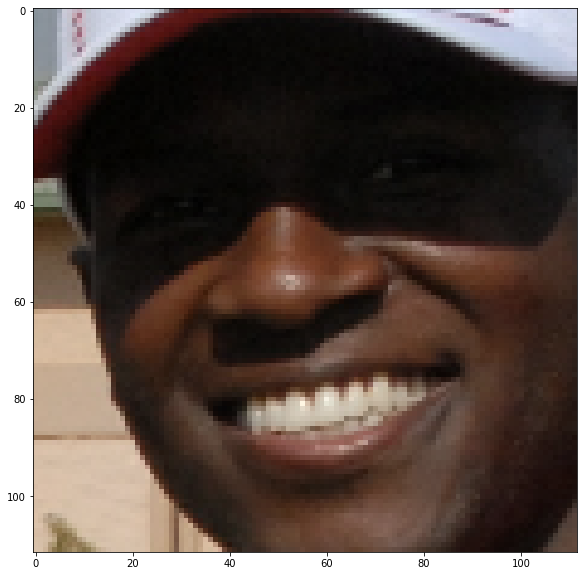

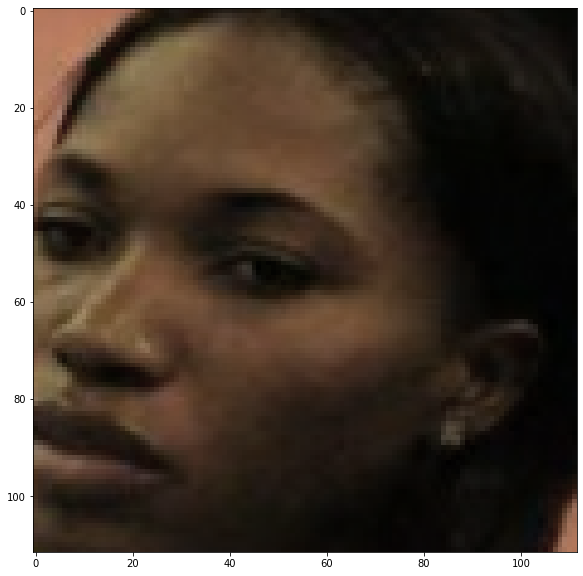

In [1]:
import time
import cv2
from absl import app, flags
from absl.flags import FLAGS
import numpy as np
from matplotlib import pyplot as plt
from dataset import load_tfrecord_dataset
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

flags.DEFINE_integer('batch_size', 100, 'batch size')
flags.DEFINE_boolean('binary_img', True, 'whether use binary file or not')
flags.DEFINE_boolean('is_ccrop', True, 'whether use central cropping or not')
flags.DEFINE_boolean('visualization', True, 'whether visualize dataset or not')


train_data_dir = "/raid/workspace/jbpark/IJB-C_Asian/"
tfrecord_name = train_data_dir+'ijbc_bin.tfrecord'

train_dataset = load_tfrecord_dataset(
    tfrecord_name, 128, binary_img=True,
    is_ccrop=False)

num_samples = 100
start_time = time.time()
for idx, parsed_record in enumerate(train_dataset.take(num_samples)):
    (x_train, _), y_train = parsed_record
    print("{} x_train: {}, y_train: {}".format(
        idx, x_train.shape, y_train.shape))
    
    recon_img = np.array(x_train[0].numpy() * 255, 'uint8')
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(recon_img)

print("data fps: {:.2f}".format(num_samples / (time.time() - start_time)))